In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def get_cpu_info(file, N):
    lines = []
    myfile = open(file, 'r')
    for myline in myfile:
        lines.append(myline)
        
    for i in range(len(lines)):
        lines[i] = lines[i].replace(",", "")
        
    t_vals = []
    cpu_vals = []
    for i in range(0, len(lines), 2):
        t_vals.append(1 / float(lines[i].split()[3]) - 1)
        cpu_vals.append(float(lines[i + 1].split()[0]) / N)
        
    return t_vals, cpu_vals;

In [50]:
t1, cpu1 = get_cpu_info('/scratch/bsafdi_root/bsafdi/wentmich/Minihalo-Tests/0.25-field/output/cpu.txt', 2e9)
t2, cpu2 = get_cpu_info('/scratch/bsafdi_root/bsafdi/wentmich/Minihalo-Tests/0.05-field/z1e6/2e8particles/output/cpu.txt', 2e8)
t3, cpu3 = get_cpu_info('/scratch/bsafdi_root/bsafdi/wentmich/Minihalo-Tests/0.05-field/z1e6/4e8particles/output/cpu.txt', 4e8)
t4, cpu4 = get_cpu_info('/scratch/bsafdi_root/bsafdi/wentmich/Minihalo-Tests/0.05-field/z1e5/output/cpu.txt', 4e8)
t5, cpu5 = get_cpu_info('/scratch/bsafdi_root/bsafdi/wentmich/Minihalo-Tests/0.05-field/z1e4/output/cpu.txt', 4e8)

#if len(t1) >= len(t2):
#    end = len(t1)
#else:
#    end = len(t2)
end = len(t1)

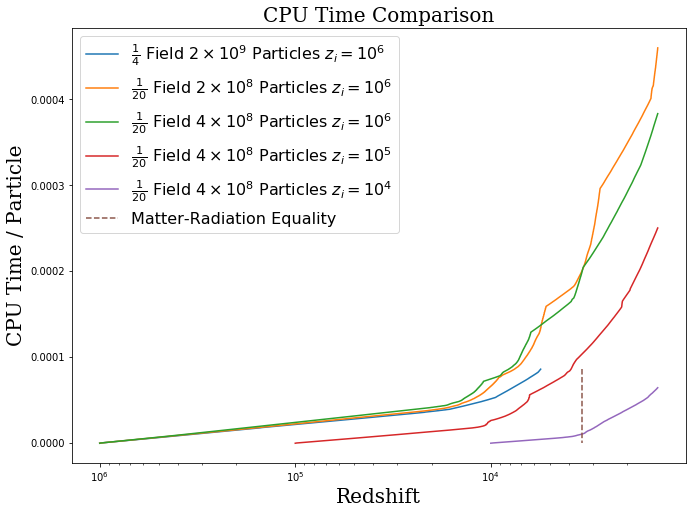

In [51]:
zcurve = 1.5e4
zcurve = 3412.
fig = plt.figure(figsize=(11, 8))
plt.plot(t1, cpu1, '-', label=r'$\frac{1}{4}$ Field $2 \times 10^9$ Particles $z_i = 10^6$')
plt.plot(t2, cpu2, '-', label=r'$\frac{1}{20}$ Field $2 \times 10^8$ Particles $z_i = 10^6$')
plt.plot(t3, cpu3, '-', label=r'$\frac{1}{20}$ Field $4 \times 10^8$ Particles $z_i = 10^6$')
plt.plot(t4, cpu4, '-', label=r'$\frac{1}{20}$ Field $4 \times 10^8$ Particles $z_i = 10^5$')
plt.plot(t5, cpu5, '-', label=r'$\frac{1}{20}$ Field $4 \times 10^8$ Particles $z_i = 10^4$')
plt.plot([zcurve]*4, [max(cpu1[:end]), max(cpu1[:end]), min(cpu1[:end]), min(cpu1[:end])], '--', label=r'Matter-Radiation Equality')
plt.xlabel('Redshift', fontname='serif', fontsize=20)
plt.ylabel('CPU Time / Particle', fontname='serif', fontsize=20)
plt.title('CPU Time Comparison', fontname='serif', fontsize=20)
plt.xscale('log')
plt.gca().invert_xaxis()
#plt.yscale('log')
plt.legend(fontsize=16)
plt.savefig('cpu_time_comparison.png')#, dpi=1000)
plt.show()

In [52]:
# I want to write an algorithm that will find the point where the behavior changes. How can I do this?
# can try to fit a piecewise linear function to the whole thing. That would have a whole lot of parameters though.
# Let's give it a shot.

def piecewise_exp(z, m1, m2, b1, b2, u):
    z_out = np.zeros(np.shape(z))
    for i in range(len(z)):
        if z[i] <= u:
            z_out[i] = m1 * z[i] + b1;
        else:
            z_out[i] = m2 * z[i] + b2;
    return z_out;

pi = np.array([-1, -10, 0.5, 5, 1e4])
t4 = np.array(t4)
cpu4 = np.array(cpu4)
popt, _ = opt.curve_fit(piecewise_linear, t4, np.log10(cpu4), p0=pi)

In [53]:
popt

array([-1.22654662e-04, -1.55424991e-05, -3.51450178e+00, -4.51900619e+00,
        1.00000000e+04])

In [57]:
zvals = t4
cpu1 = piecewise_linear(zvals, popt[0], popt[1], popt[2], popt[3], popt[4])

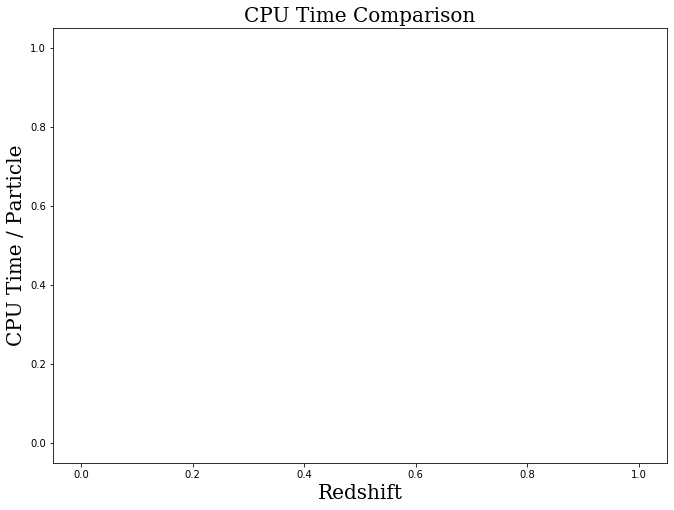

In [58]:
fig = plt.figure(figsize=(11, 8))
plt.plot(np.exp(zvals), cpu1, '-')
plt.xlabel('Redshift', fontname='serif', fontsize=20)
plt.ylabel('CPU Time / Particle', fontname='serif', fontsize=20)
plt.title('CPU Time Comparison', fontname='serif', fontsize=20)
#plt.xscale('log')
#plt.gca().invert_xaxis()
#plt.savefig('cpu_time_comparison.png')#, dpi=1000)
plt.show()

In [ ]:
"""It's not quite working. I think that there are too many parameters to fit well"""